# Binance report
### Vladislav Trnka 2020 

# Data processing

<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
#load data
df = pd.read_csv('data.log', sep=" ")
df['timeBought'] = pd.to_datetime(df['timeBought'], unit='s')
df['timeSell'] = pd.to_datetime(df['timeSell'], unit='s')

In [125]:
#create usefull columns
df['timeDelta'] = df['timeSell'] - df['timeBought']
df['winBetter'] = df['win'] * 2 - 1

In [126]:
#win
currentWinTrueValue = 0
currentWinFalseValue = 0

winTrueColumn = []
winFalseColumn = []

for win in df['win']:
    
    if win:
        currentWinTrueValue += 1
    else:
        currentWinFalseValue += 1
    
    winTrueColumn.append(currentWinTrueValue)
    winFalseColumn.append(currentWinFalseValue)

df['winTrue'] = winTrueColumn
df['winFalse'] = winFalseColumn

In [127]:
#gain
currentGainValue = 0
currentGainTrueValue = 0
currentGainFalseValue = 0

gainColumn = []
gainTrueColumn = []
gainFalseColumn = []

for win, sumBought, sumSell in zip(df['win'], df['sumBought'], df['sumSell']):
    
    diff = sumSell - sumBought
    
    currentGainValue += diff
    
    if win:
        currentGainTrueValue += diff
    else:
        currentGainFalseValue += diff

    gainColumn.append(currentGainValue)
    gainTrueColumn.append(currentGainTrueValue)
    gainFalseColumn.append(currentGainFalseValue)

df['gain'] = gainColumn
df['gainTrue'] = gainTrueColumn
df['gainFalse'] = gainFalseColumn

# Some interestring values

### 5 best coins

In [156]:
df_temp = df.drop(columns=['priceBought', 'priceSell', 'winTrue', 'winFalse', 'gainTrue', 'gainFalse', 'win', 'gain'])
df_temp['gain'] = df_temp['sumSell'] - df_temp['sumBought']
df_temp = df_temp.drop(columns=['sumBought', 'sumSell'])

df_temp.groupby(by='pair').sum().sort_values(by='winBetter', ascending=False).head(5)

,winBetter,gain
pair,,
MITHUSDT,2,0.738336
ICXUSDT,1,0.375723


### 5 worst coins

In [134]:
df_temp.groupby(by='pair').sum().sort_values(by='winBetter', ascending=True).head(5)

,winBetter,gain
pair,,
ICXUSDT,1,0.375723
MITHUSDT,2,0.738336


### Time delta statistics

In [150]:
print("Mean   : ", df['timeDelta'].mean())
print("Median : ", df['timeDelta'].median())
print("Max    : ", df['timeDelta'].max())
print("Min    : ", df['timeDelta'].min())

Mean   :  0 days 00:18:20.650108575
Median :  0 days 00:15:05.476741314
Max    :  0 days 00:25:01.755124569
Min    :  0 days 00:14:54.718459844


<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

# Graphs

### Completed trades comparison

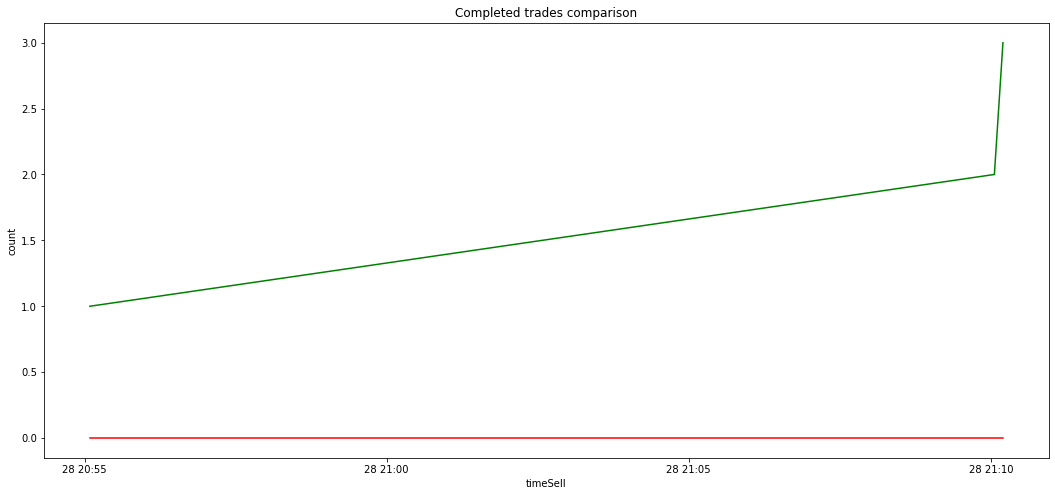

In [131]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df, x='timeSell', y='winTrue', color='green')
sns.lineplot(data=df, x='timeSell', y='winFalse', color='red')
plt.title('Completed trades comparison')
plt.ylabel('count')
print()

### USD gained

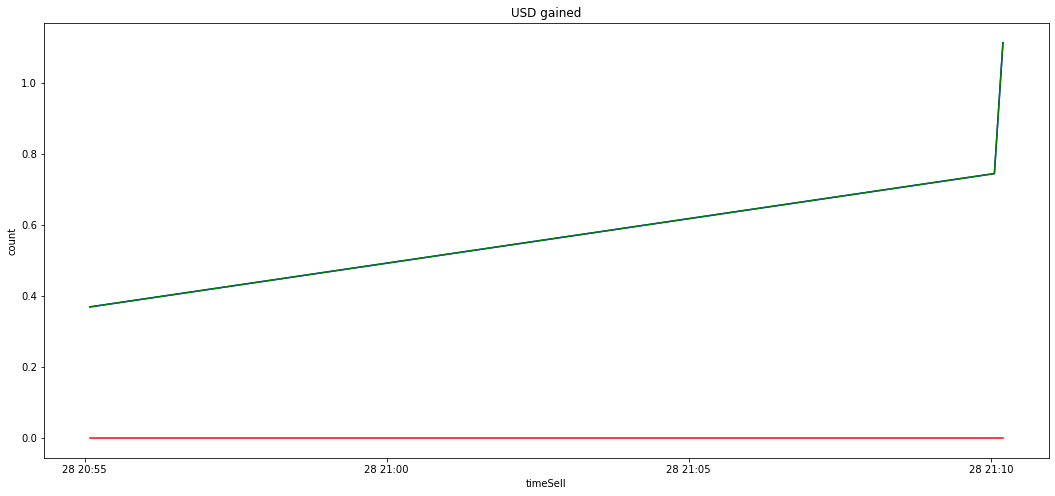

In [132]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df, x='timeSell', y='gain', color='blue')
sns.lineplot(data=df, x='timeSell', y='gainTrue', color='green')
sns.lineplot(data=df, x='timeSell', y='gainFalse', color='red')
plt.title('USD gained')
plt.ylabel('USD')
print()